# Kernel Machines

## Test multiclass SVM - without kernel

Training Accuracy: 61.90%
Test Accuracy: 66.67%


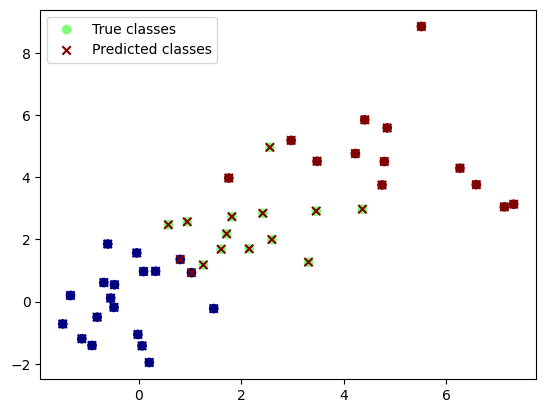

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from multiclass_svm import MultiClassSVM

# Toy data
np.random.seed(42)
X = np.random.randn(150, 2)
y = np.repeat([0, 1, 2], 50)
X[y == 1] += 2.5
X[y == 2] += 5.0

########

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

model = MultiClassSVM(input_dim=2, num_classes=3, C=1.0)
model.train(X_train, y_train, epochs=100)

train_predictions = model.predict(X_train).numpy()
test_predictions = model.predict(X_test).numpy()


########

train_accuracy = np.mean(train_predictions == y_train.numpy())
test_accuracy = np.mean(test_predictions == y_test.numpy())

print(f"Training Accuracy: {train_accuracy*100:.2f}%")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

# Visualize
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='jet', marker='o', label='True classes')
plt.scatter(X_test[:, 0], X_test[:, 1], c=test_predictions, cmap='jet', marker='x', label='Predicted classes')
plt.legend()
plt.show()